Completed in December 2018

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.  

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).  

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).  

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import chi2

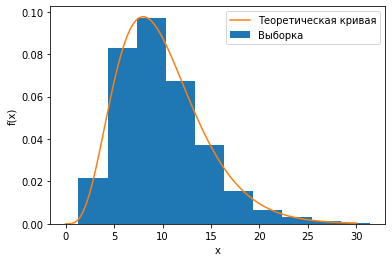

In [2]:
# Выберите ваше любимое непрерывное распределение: хи квадрат k-го порядка
# https://ru.wikipedia.org/wiki/Распределение_хи-квадрат
k = 10. 

# Сгенерируем из него выборку объёма 1000
Vyborka = chi2(k) 
obrazec = Vyborka.rvs(1000)

# Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины
x = np.linspace(0,30,100) 
plt.hist(obrazec, density=True, label='Выборка')
PDF = Vyborka.pdf(x) 
plt.plot(x, PDF, label='Теоретическая кривая')
plt.legend(loc='best') 
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

In [3]:
#Используя информацию о среднем и дисперсии исходного распределения (из википедии
# https://ru.wikipedia.org/wiki/Распределение_хи-квадрат),посчитаем значения параметров нормальных распределений, 
# которыми, согласно ЦПТ, приближается распределение выборочных средних. 
EX = k
DX = 2*k
sd = math.sqrt(2*k)
print ('EX=', EX, ' sd=', sd, ' DX=', DX)

EX= 10.0  sd= 4.47213595499958  DX= 20.0


mu= 10.0 , sigma= 2.0


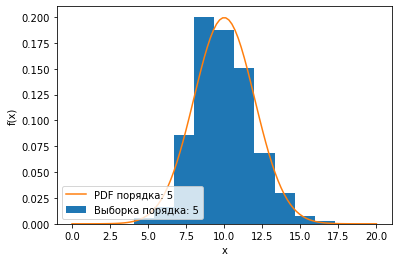


mu= 10.0 , sigma= 1.4142135623730951


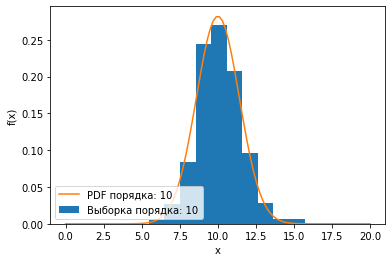


mu= 10.0 , sigma= 0.6324555320336759


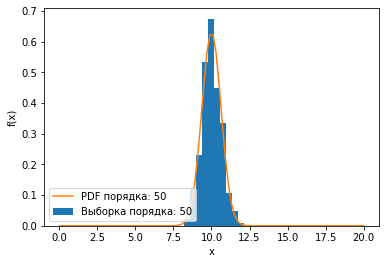

In [4]:
#Оценим распределение выборочного среднего нашей случайной величины при разных выборках.
#При значениях n (5, 10 и 50) сгенерируем 1000 выборок объёма n и 
#построим гистограммы распределений их выборочных средних.
def function1(n, mu, dispersia):
    # генерируем выборки и строим гистограммы их выборочных средних
    srednee = []
    for i in range(1000):
        srednee.append(Vyborka.rvs(n).mean()) 
    plt.hist(srednee,normed=True, label='Выборка порядка: '+str(n)) 
    
    #Поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения
    sigma = math.sqrt(dispersia/n)
    print ('mu=' , mu, ', sigma=' , sigma)
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,20,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='PDF порядка: ' + str(n))
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(loc='lower left')
    plt.show()
    return '' 

print (function1(5, EX, DX))
print (function1(10, EX, DX))
print (function1(50, EX, DX))

Вопросы:
1. Опишите разницу между полученными распределениями при различных значениях n. 
2. Как меняется точность аппроксимации распределения выборочных средних нормальных с ростом n?

Ответы:
1. При увеличении n, распределение средних значений начинает сходиться к матожиданию, а среднеквадратичное отклонение падает. 
2. При увеличении n точность аппроксимации распределения выборочных средних нормальных растет.